In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = None

In [2]:
data = pd.read_pickle("../Data/Data.pickle")

# Descriptive Statistics
Pandas has a `describe` function which computes a series of statistics on each column.
For this analysis, some columns are automatically excluded, as descriptive statistics are only useful for numeric data.
`TotalDemand` has an average of 4619MW with a minimum of 22 mW and a maximum of 14580 MW.
`WetBulbTemperature` ranges from a minimum of -9.0°C to a maximum of 41°C.

We are also able to find the pairwise correlation between columns.
This shows us that wet bulb temperature and station pressure are particularly relevant features, as they are reasonably correlated to our energy demand (meaning they will likely help with predictions later on).

*Note that this only calculates the correlation for numeric datatypes.*

In [3]:
data.describe()

,TotalDemand,RRP,WetBulbTemperature,SeaPressure,StationPressure
count,1.656254e+06,1.656254e+06,1.656254e+06,1.656254e+06,1.656254e+06
mean,4.619521e+03,5.143376e+01,1.346589e+01,1.016535e+03,1.012486e+03
std,2.848791e+03,1.910091e+02,4.668981e+00,7.543408e+00,7.798352e+00
min,2.189000e+01,-1.000000e+03,-9.000000e-01,9.772000e+02,9.693000e+02
25%,1.413990e+03,2.336000e+01,9.900000e+00,1.011900e+03,1.007800e+03
50%,5.131249e+03,3.443000e+01,1.310000e+01,1.016800e+03,1.013100e+03
75%,6.591798e+03,5.490000e+01,1.700000e+01,1.021600e+03,1.017900e+03
max,1.457986e+04,1.470000e+04,4.100000e+01,1.041800e+03,1.037600e+03


In [4]:
data.corr()

,TotalDemand,RRP,WetBulbTemperature,SeaPressure,StationPressure
TotalDemand,1.000000,0.014473,0.357300,0.044859,0.188955
RRP,0.014473,1.000000,0.032914,-0.019025,-0.017678
WetBulbTemperature,0.357300,0.032914,1.000000,-0.249321,-0.125920
SeaPressure,0.044859,-0.019025,-0.249321,1.000000,0.887758
StationPressure,0.188955,-0.017678,-0.125920,0.887758,1.000000


# Resampling
Due to the large amount of data, it can sometimes be hard to interpret data from a graph as there is alot to notice.
A way of simplifying a graph to make it readable is resampling data.
This works by effectively reducing the amount of data we need to look at.

Demonstrated below is a series of graphs which have been resampled according to different time periods.
As the data is resampled more, the trends become easily noticable.

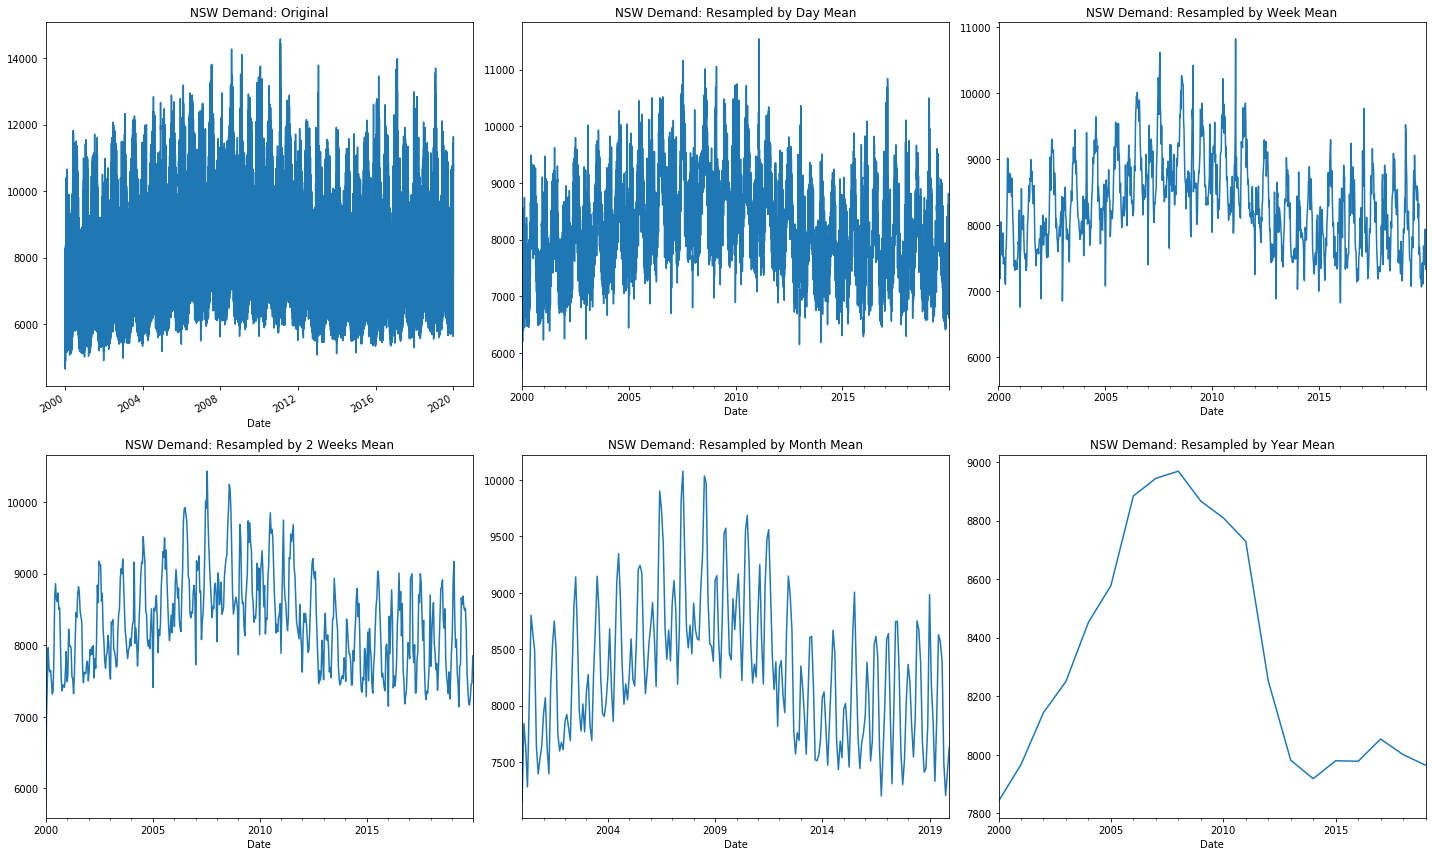

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), tight_layout=True)

data.groupby("Region").get_group("NSW")["TotalDemand"]["2000":"2019"].plot(title="NSW Demand: Original",ax=axes[0,0])
data.groupby("Region").resample("D").mean()["TotalDemand"]["NSW"]["2000":"2019"].plot(title="NSW Demand: Resampled by Day Mean",ax=axes[0,1])
data.groupby("Region").resample("W").mean()["TotalDemand"]["NSW"]["2000":"2019"].plot(title="NSW Demand: Resampled by Week Mean",ax=axes[0,2])
data.groupby("Region").resample("2W").mean()["TotalDemand"]["NSW"]["2000":"2019"].plot(title="NSW Demand: Resampled by 2 Weeks Mean",ax=axes[1,0])
data.groupby("Region").resample("M").mean()["TotalDemand"]["NSW"]["2000":"2019"].plot(title="NSW Demand: Resampled by Month Mean",ax=axes[1,1])
data.groupby("Region").resample("Y").mean()["TotalDemand"]["NSW"]["2000":"2019"].plot(title="NSW Demand: Resampled by Year Mean",ax=axes[1,2])

# Long term analysis
## Energy over 20 years
### For All States
* There is a repeating consistent cycle of peaks and troughs in the demand for energy
* The demand for each state is different as shown by different scales on the demand axes which is most likely attributed to the vastly different populations of each state however this can not be clarified as we lack population data for this project
* Demand increases in most states during winter and/or summer
* Demand is generally at its lowest during spring and autumn
* Peaking occurs in summer and winter states, where the predictability of peaks is greatest during winter months (regardless of state)

### Tasmania
* The average of the cycle appears to stay relatively the same over the time frame for which there is demand data for Tasmania
* The maximum occurs during the middle of each year during the winters.
* The minimums occur during the end of each year during Summer months which is different to the other states which could be the result of significantly cooler Summers compared to the other states.
* The difference between the maximums and minimum stays relatively consistent with time

### Victoria
* The average of the cycle appears to increase steadily to a peak at 2008 where it subsequently decreases again until about 2015 where it plateaus (similarly to New South Wales)
* The maximum occurs during the middle of each year during winter, however, occasionally peaks during the summertime (most likely on extremely hot days)
* The minimums occur during the end of each year during summer months

### New South Wales
* The average of the cycle appears to increase steadily to a peak at 2009 where it subsequently decreases until around 2014 (where it plateaus), similarly to Victoria.
* The maximum occurs during the middle of each year during winter and the summer months, likely due to the highly fluctuating hot and cold days
* The minimums occur during the spring and autumn

### Queensland
* The average of the cycle appears to increase steadily through to 2010 where it plateaus until 2015, jumps up and continues to plateau
* The maximums occur during the end of each year during summer months however there are also minor peaks during winter
* The minimums occur during the spring and autumn

### South Australia
* The average of the cycle appears to stay relatively flat until it slowly decreases after ~2009
* The maximums occur during the end of each year during summer months and the middle of the year during winter
* The minimums occur during the spring and autumn

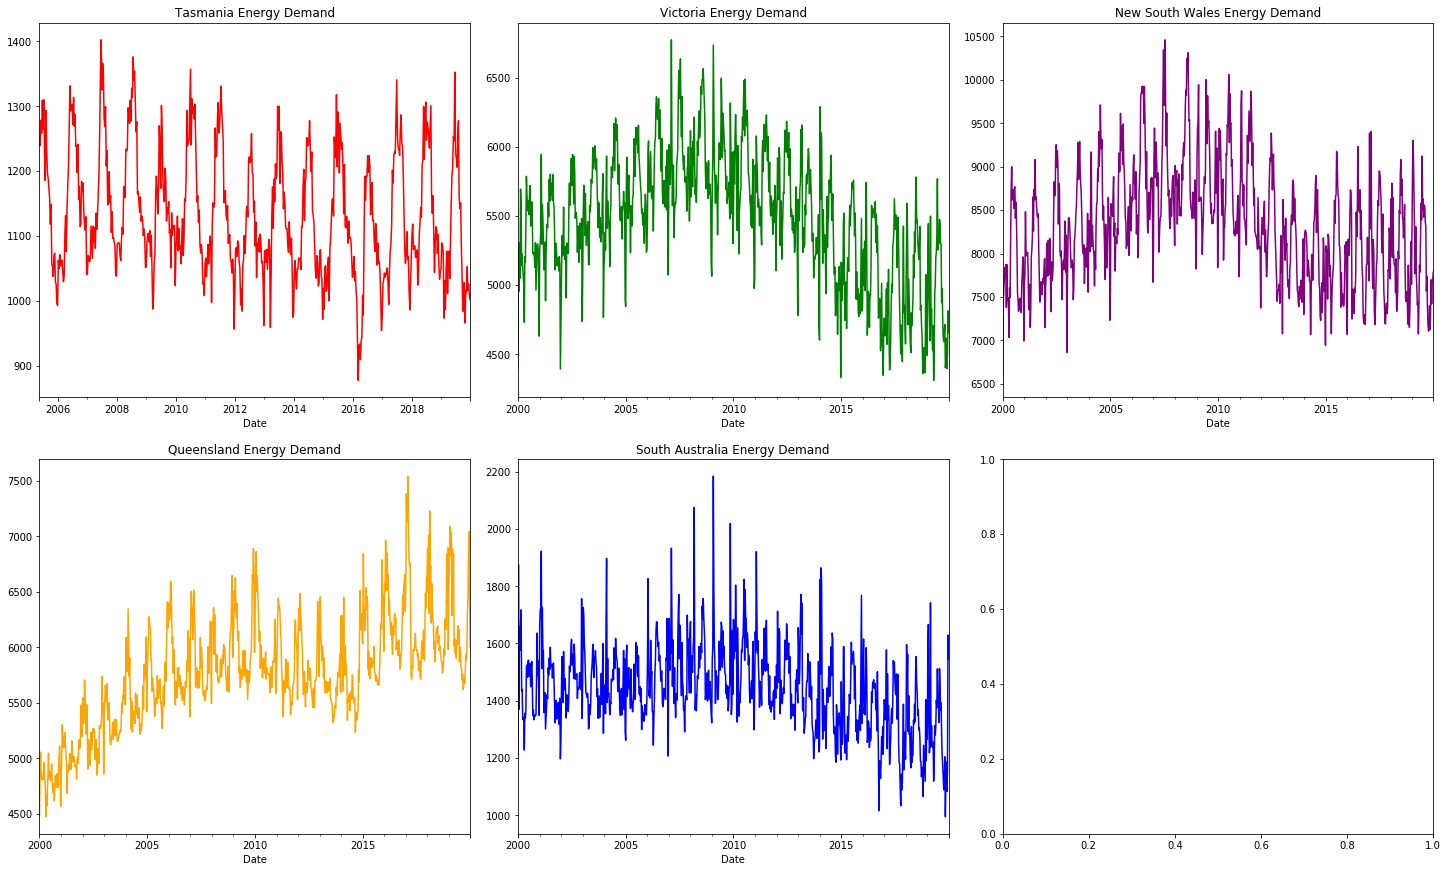

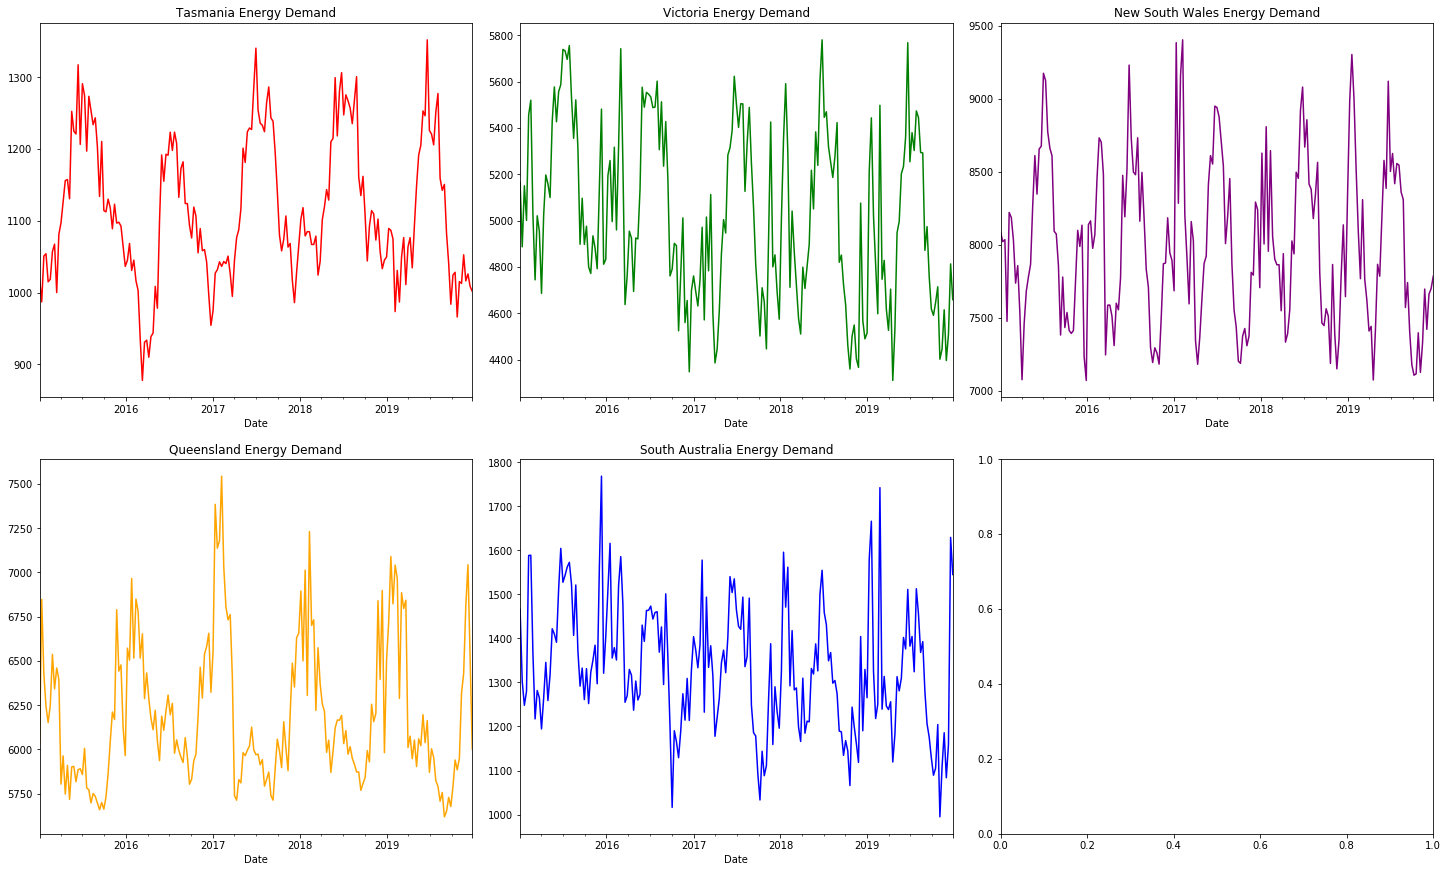

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), constrained_layout=True)

data.groupby("Region").resample("9D").mean()["TotalDemand"]["TAS"]["2000":"2019"].plot(color= "red",title="Tasmania Energy Demand",ax=axes[0,0])
data.groupby("Region").resample("9D").mean()["TotalDemand"]["VIC"]["2000":"2019"].plot(color= "green",title="Victoria Energy Demand",ax=axes[0,1])
data.groupby("Region").resample("9D").mean()["TotalDemand"]["NSW"]["2000":"2019"].plot(color= "purple",title="New South Wales Energy Demand",ax=axes[0,2])
data.groupby("Region").resample("9D").mean()["TotalDemand"]["QLD"]["2000":"2019"].plot(color= "orange",title="Queensland Energy Demand",ax=axes[1,0])
data.groupby("Region").resample("9D").mean()["TotalDemand"]["SA"]["2000":"2019"].plot(color="blue",title="South Australia Energy Demand",ax=axes[1,1])


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), constrained_layout=True)

data.groupby("Region").resample("9D").mean()["TotalDemand"]["TAS"]["2015":"2019"].plot(color= "red",title="Tasmania Energy Demand",ax=axes[0,0])
data.groupby("Region").resample("9D").mean()["TotalDemand"]["VIC"]["2015":"2019"].plot(color= "green",title="Victoria Energy Demand",ax=axes[0,1])
data.groupby("Region").resample("9D").mean()["TotalDemand"]["NSW"]["2015":"2019"].plot(color= "purple",title="New South Wales Energy Demand",ax=axes[0,2])
data.groupby("Region").resample("9D").mean()["TotalDemand"]["QLD"]["2015":"2019"].plot(color= "orange",title="Queensland Energy Demand",ax=axes[1,0])
data.groupby("Region").resample("9D").mean()["TotalDemand"]["SA"]["2015":"2019"].plot(color="blue",title="South Australia Energy Demand",ax=axes[1,1])

### State demand comparison
Below is a graph of how energy demand between different states compares between 2015 to 2019.
New South Wales has the highest demand, followed by Queensland, Victoria, South Australia and finally Tasmania.

These significant differences, particularly South Australia and Tasmania, whose demand is almost a quarter of the other states, is most likely due to the different populations of the respective states, along with economic conditions.
A state with a larger population would require more energy demand, and a state with more or less technological advancement would affect its devices efficiency and so energy usage.
This, however, can not be evaluated conclusively due to the absence of exact population and economic data, however, general knowledge of these states does support this assumption.

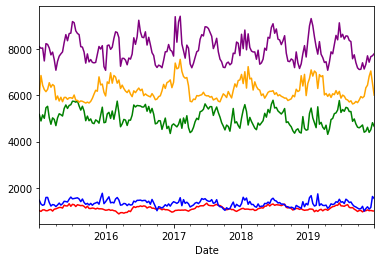

In [7]:
data.groupby("Region").resample("9D").mean()["TotalDemand"]["TAS"]["2015":"2019"].plot(color= "red")
data.groupby("Region").resample("9D").mean()["TotalDemand"]["VIC"]["2015":"2019"].plot(color= "green")
data.groupby("Region").resample("9D").mean()["TotalDemand"]["NSW"]["2015":"2019"].plot(color= "purple")
data.groupby("Region").resample("9D").mean()["TotalDemand"]["QLD"]["2015":"2019"].plot(color= "orange")
data.groupby("Region").resample("9D").mean()["TotalDemand"]["SA"]["2015":"2019"].plot(color="blue")

## Temperature over 20 Years
Looking at the temperature data over the 20 years for each state and 5 years between 2015 and 2019, we can see the following observations:

### For all states
* There is a repeating cycle where temperature peaks and then falls into troughs
* These peaks of higher temperature occur during summer each year
* Similarly, the troughs of colder temperature occur during Winter each year
* This is expected from because of season changes within Australian states
* The shape of the cycle for each state is comparably similar

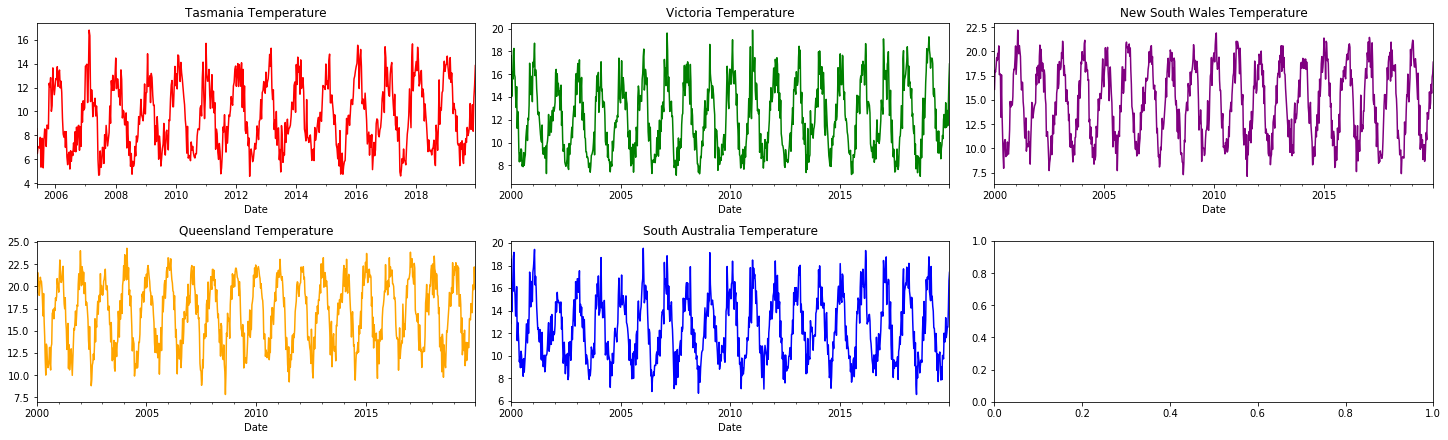

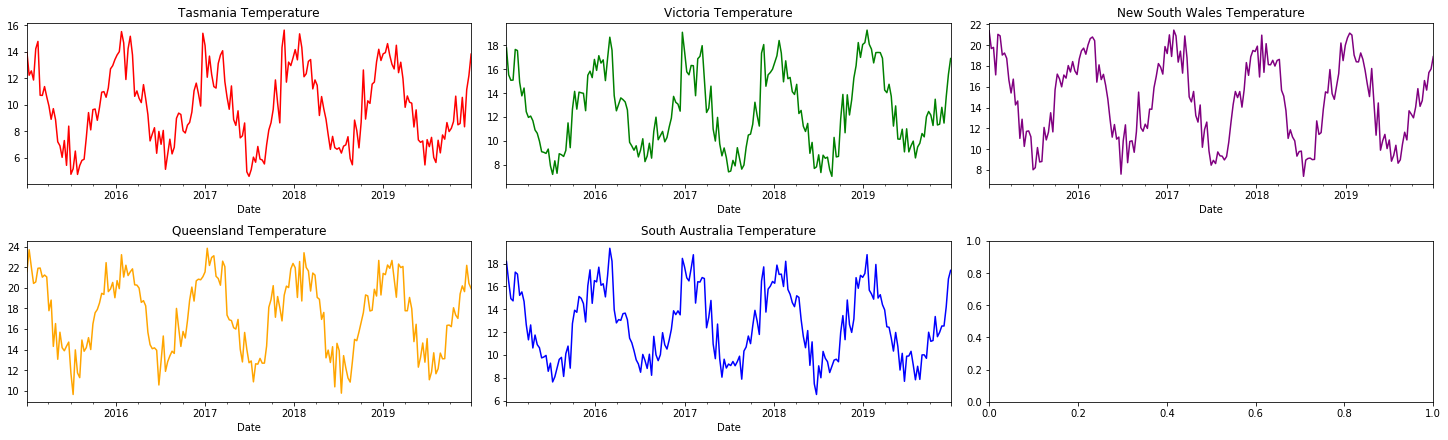

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 6), constrained_layout=True)

data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["TAS"]["2000":"2019"].plot(color= "red",title="Tasmania Temperature",ax=axes[0,0])
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["VIC"]["2000":"2019"].plot(color= "green",title="Victoria Temperature",ax=axes[0,1])
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["NSW"]["2000":"2019"].plot(color= "purple",title="New South Wales Temperature",ax=axes[0,2])
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["QLD"]["2000":"2019"].plot(color= "orange",title="Queensland Temperature",ax=axes[1,0])
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["SA"]["2000":"2019"].plot(color="blue",title="South Australia Temperature",ax=axes[1,1])


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 6), constrained_layout=True)

data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["TAS"]["2015":"2019"].plot(color= "red",title="Tasmania Temperature",ax=axes[0,0])
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["VIC"]["2015":"2019"].plot(color= "green",title="Victoria Temperature",ax=axes[0,1])
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["NSW"]["2015":"2019"].plot(color= "purple",title="New South Wales Temperature",ax=axes[0,2])
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["QLD"]["2015":"2019"].plot(color= "orange",title="Queensland Temperature",ax=axes[1,0])
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["SA"]["2015":"2019"].plot(color="blue",title="South Australia Temperature",ax=axes[1,1])

### State temperature comparison
Below is a graph of how the temperatures between different states compare from 2015 to 2019.

Queensland has the highest temperature during summer, followed by New South Wales, South Australia and Victoria, who are similar, and finally Tasmania.

Likewise, Tasmania has the coolest winters followed by South Australia and Victoria (tend to be similar), New South Wales and finally Queensland who has the warmest winter.

These differences in temperature between the states could account for the different demand cycles in regards to when peaks and troughs occur.
A state like Tasmania has really cold winters but not so extreme summers so demand would be at its highest in winter and only have a mild peak in summer.
In contrast, Queensland has really hot Summers but not so extreme Winters so demand would be at its highest in Summer and only have a mild peak during winter.
States like Victoria, New South Wales and South Australia can have both cold winters and hot summers so demands peaks at both times.

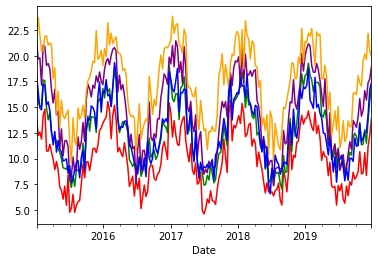

In [9]:
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["TAS"]["2015":"2019"].plot(color= "red")
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["VIC"]["2015":"2019"].plot(color= "green")
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["NSW"]["2015":"2019"].plot(color= "purple")
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["QLD"]["2015":"2019"].plot(color= "orange")
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["SA"]["2015":"2019"].plot(color="blue")

## Temperature and energy correlations
The relationship between temperature and energy demand can be shown on a timeseries graph as shown below. While this shows oscillation of temperature and energy demand for each state.
The relationship between is best shown a scatter plot of `WetBulbTemperature` and `TotalDemand`, which also has the added benefit of eliminated the time variable.

### Tasmania:
Demand is highest when the temperature is at its minimum because Tasmania is a relatively cooler Australian State

### Victoria:
When the temperature is at its lowest, demand is high however it is highest when the temperature is at its maximum.
This is due to the fact that Victoria has both cold and hot weather.

### New South Wales:
When the temperature is at its lowest and highest, demand is at its peak.
Especially since New South Wales has both cold and hot weather (even more so that Victoria).

### Queensland:
In contrast to Tasmania, Queensland has a relatively warmer climate and as such, the demand is highest when the temperature is at its maximum.

### South Australia:
Similar to Victoria, when the temperature is at its lowest, demand is high, however, it is highest when the temperature is at its maximum.
This is because South Australia has both relatively cold and hot weather.

Text(0.5, 0, 'Temperature (°C)')

Text(0, 0.5, 'Energy Demand (MW)')

Text(0.5, 1.0, 'Temperature and Demand in Tasmania (2000-2018)')

Text(0.5, 0, 'Temperature (°C)')

Text(0, 0.5, 'Energy Demand (MW)')

Text(0.5, 1.0, 'Temperature and Demand in Victoria (2000-2018)')

Text(0.5, 0, 'Temperature (°C)')

Text(0, 0.5, 'Energy Demand (MW)')

Text(0.5, 1.0, 'Temperature and Demand in New South Wales (2000-2018)')

Text(0.5, 0, 'Temperature (°C)')

Text(0, 0.5, 'Energy Demand (MW)')

Text(0.5, 1.0, 'Temperature and Demand in Queensland (2000-2018)')

Text(0.5, 0, 'Temperature (°C)')

Text(0, 0.5, 'Energy Demand (MW)')

Text(0.5, 1.0, 'Temperature and Demand in South Australia (2000-2018)')

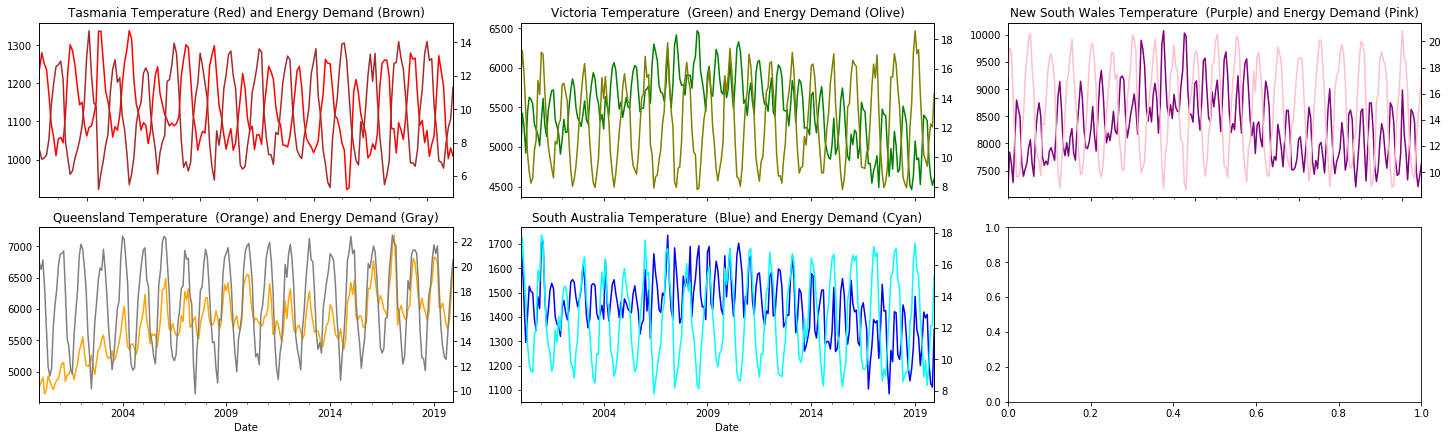

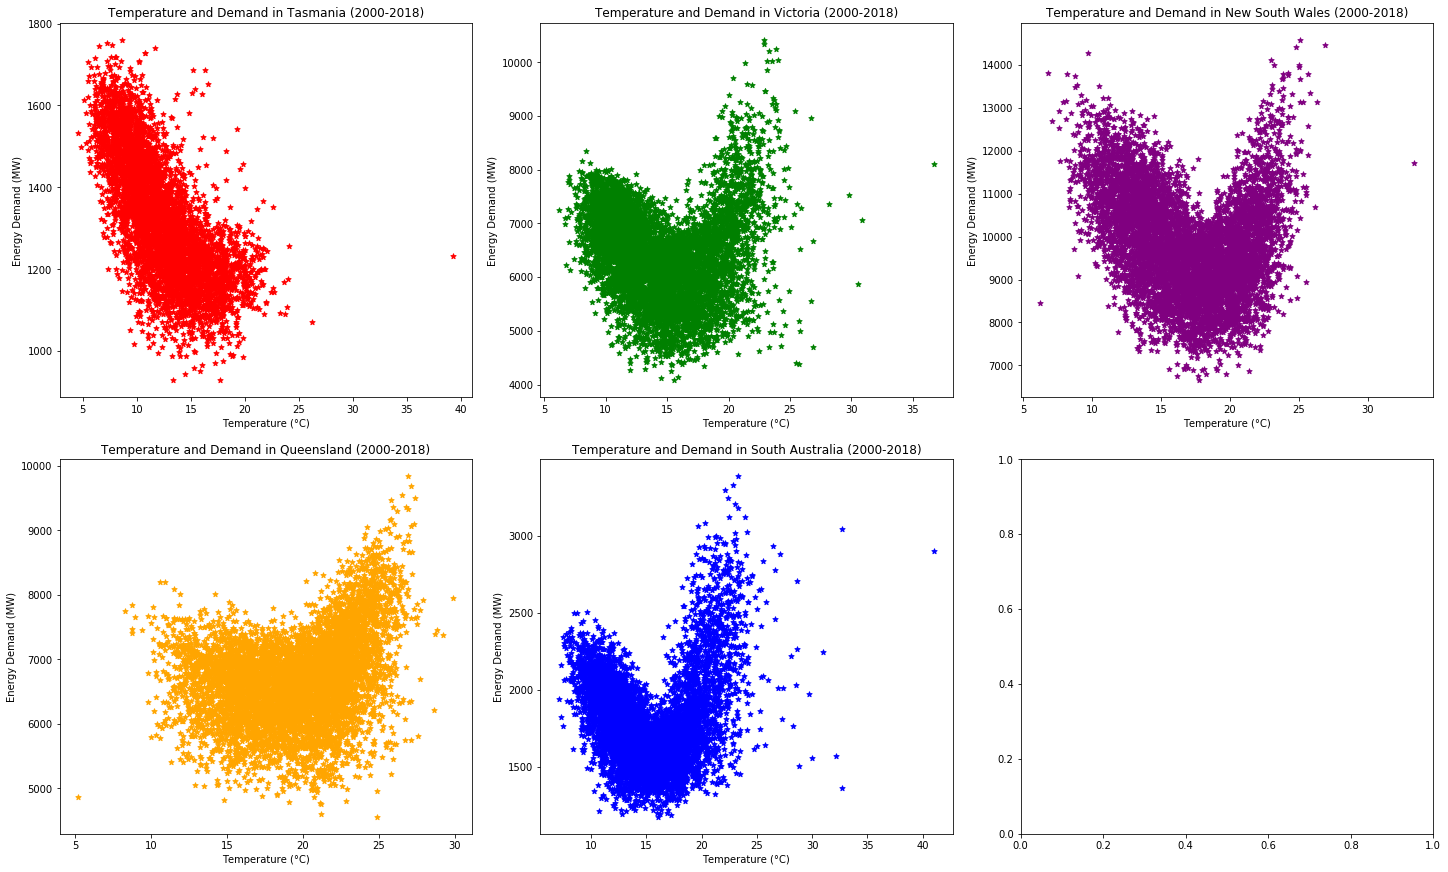

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 6), constrained_layout=True)

data.groupby("Region").resample("M").mean()["TotalDemand"]["TAS"]["2000":"2019"].plot(color= "red",ax=axes[0,0])
data.groupby("Region").resample("M").mean()["TotalDemand"]["VIC"]["2000":"2019"].plot(color= "green",ax=axes[0,1])
data.groupby("Region").resample("M").mean()["TotalDemand"]["NSW"]["2000":"2019"].plot(color= "purple",ax=axes[0,2])
data.groupby("Region").resample("M").mean()["TotalDemand"]["QLD"]["2000":"2019"].plot(color= "orange",ax=axes[1,0])
data.groupby("Region").resample("M").mean()["TotalDemand"]["SA"]["2000":"2019"].plot(color="blue",ax=axes[1,1])

data.groupby("Region").resample("M").mean()["WetBulbTemperature"]["TAS"]["2000":"2019"].plot(color= "brown",title="Tasmania Temperature (Red) and Energy Demand (Brown)",ax=axes[0,0], secondary_y=True)
data.groupby("Region").resample("M").mean()["WetBulbTemperature"]["VIC"]["2000":"2019"].plot(color= "olive",title="Victoria Temperature  (Green) and Energy Demand (Olive)",ax=axes[0,1], secondary_y=True)
data.groupby("Region").resample("M").mean()["WetBulbTemperature"]["NSW"]["2000":"2019"].plot(color= "pink",title="New South Wales Temperature  (Purple) and Energy Demand (Pink)",ax=axes[0,2], secondary_y=True)
data.groupby("Region").resample("M").mean()["WetBulbTemperature"]["QLD"]["2000":"2019"].plot(color= "gray",title="Queensland Temperature  (Orange) and Energy Demand (Gray)",ax=axes[1,0], secondary_y=True)
data.groupby("Region").resample("M").mean()["WetBulbTemperature"]["SA"]["2000":"2019"].plot(color="cyan",title="South Australia Temperature  (Blue) and Energy Demand (Cyan)",ax=axes[1,1], secondary_y=True)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), constrained_layout=True)

ax = data.groupby("Region").get_group("TAS").resample("D").max()["2000":"2018"].plot(kind="scatter",x="WetBulbTemperature", y="TotalDemand",  marker= "*", s=30, color= "red", ax=axes[0,0])
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel("Energy Demand (MW)")
ax.set_title('Temperature and Demand in Tasmania (2000-2018)')


ax = data.groupby("Region").get_group("VIC").resample("D").max()["2000":"2018"].plot(kind="scatter",x="WetBulbTemperature", y="TotalDemand",  marker= "*", s=30, color= "green", ax=axes[0,1])
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel("Energy Demand (MW)")
ax.set_title('Temperature and Demand in Victoria (2000-2018)')


ax = data.groupby("Region").get_group("NSW").resample("D").max()["2000":"2018"].plot(kind="scatter",x="WetBulbTemperature", y="TotalDemand",  marker= "*", s=30, color= "purple", ax=axes[0,2])
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel("Energy Demand (MW)")
ax.set_title('Temperature and Demand in New South Wales (2000-2018)')


ax = data.groupby("Region").get_group("QLD").resample("D").max()["2000":"2018"].plot(kind="scatter",x="WetBulbTemperature", y="TotalDemand",  marker= "*", s=30, color= "orange", ax=axes[1,0])
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel("Energy Demand (MW)")
ax.set_title('Temperature and Demand in Queensland (2000-2018)')


ax = data.groupby("Region").get_group("SA").resample("D").max()["2000":"2018"].plot(kind="scatter",x="WetBulbTemperature", y="TotalDemand",  marker= "*", s=30, color= "blue", ax=axes[1,1])
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel("Energy Demand (MW)")
ax.set_title('Temperature and Demand in South Australia (2000-2018)')
plt.show()

# Short Term Analysis
The graphs below show the comparison of energy demand between regions for a single day and a week for winter and summer.

Generally, the energy demand from New South Wales is higher than that in other regions and Tasmania & South Australia are far lower than other regions due to population size however the pattern is the same across them all.
There is generally always two periods of increased energy demand, in the morning from about 5-9 am and in the early evening from 4-7 pm.
These are the times in which people are most active in homes, before and after work and study for most people.
This pattern persists through various times as shown from the random selection of times form different states and time of year.

A Winter day is relatively similar across the states with regards to the pattern of increasing and decreasing energy demand.
During a week in Winter, the pattern across days is similar however the demand is increased in the latter days during the week.
The demand on a Summer day is similar to that of a Winter day however when considering a week in summer, the trend in a day can be lost on really hot days where it just peaks once instead of twice.

## Winter Day (11/06/2017)

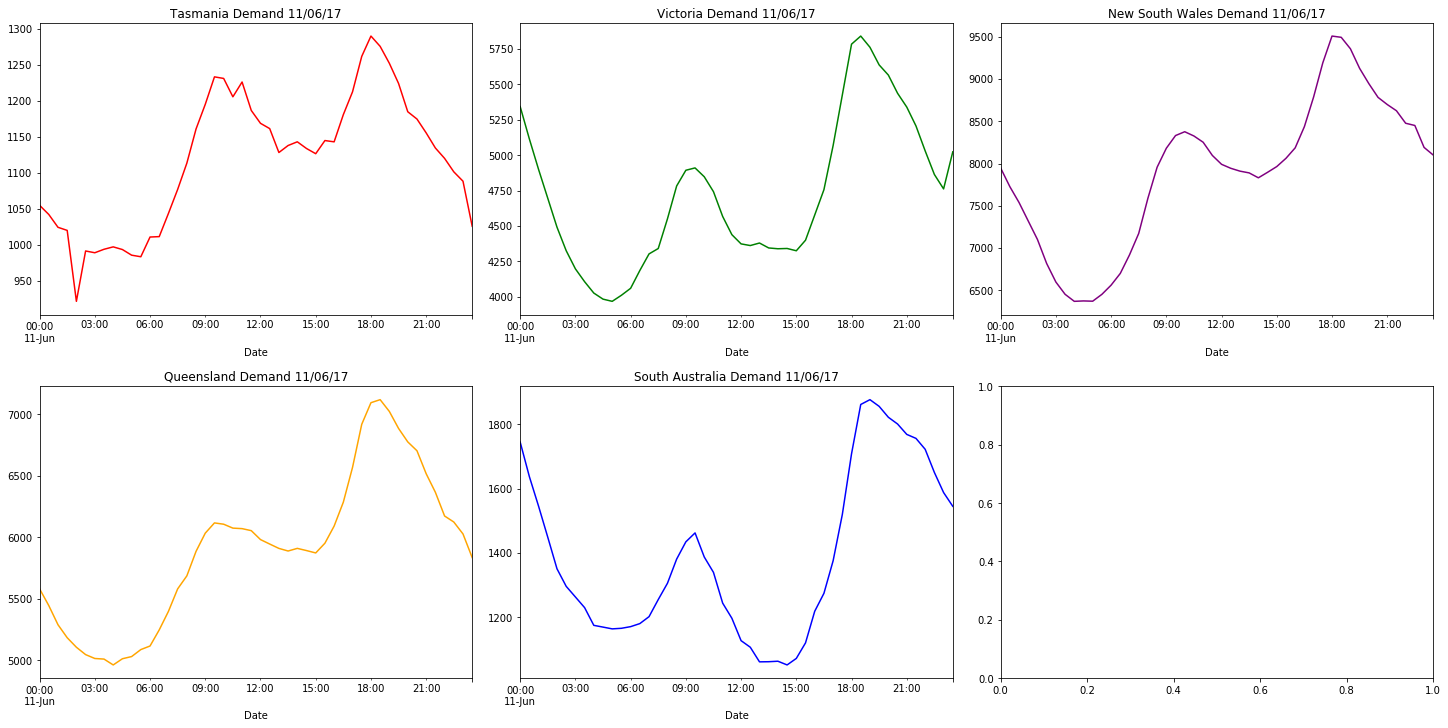

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10), constrained_layout=True)

data.groupby("Region").get_group("TAS")["TotalDemand"]["2017-06-11"].plot(color= "red",title="Tasmania Demand 11/06/17",ax=axes[0,0])
data.groupby("Region").get_group("VIC")["TotalDemand"]["2017-06-11"].plot(color= "green",title="Victoria Demand 11/06/17",ax=axes[0,1])
data.groupby("Region").get_group("NSW")["TotalDemand"]["2017-06-11"].plot(color= "purple",title="New South Wales Demand 11/06/17",ax=axes[0,2])
data.groupby("Region").get_group("QLD")["TotalDemand"]["2017-06-11"].plot(color= "orange",title="Queensland Demand 11/06/17",ax=axes[1,0])
data.groupby("Region").get_group("SA")["TotalDemand"]["2017-06-11"].plot(color="blue",title="South Australia Demand 11/06/17",ax=axes[1,1])

## Winter Week (11/06/2017 - 17/06/2017)

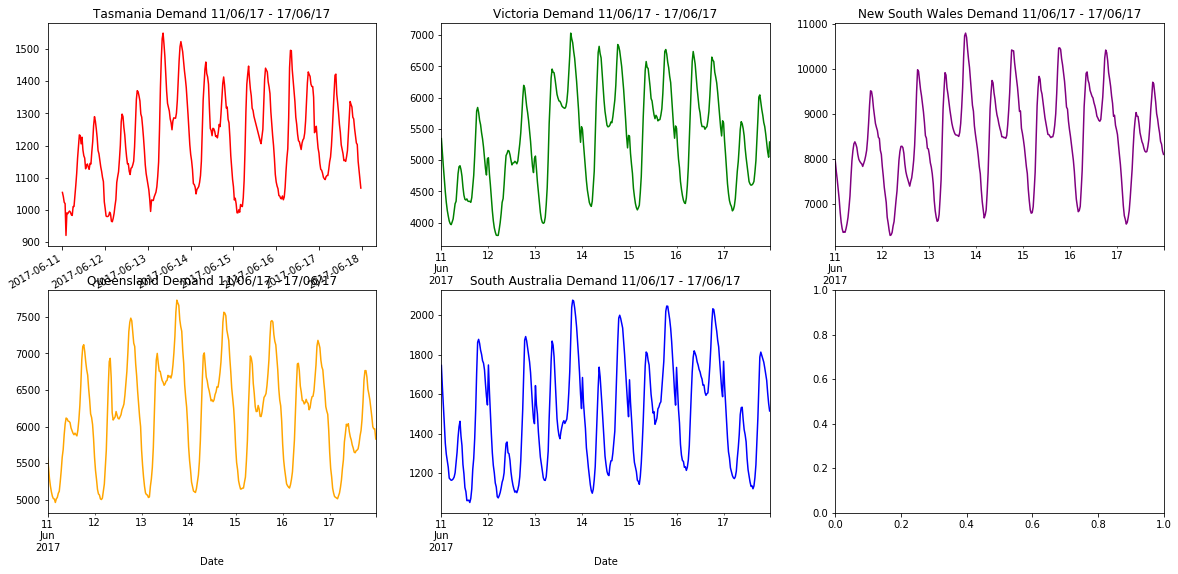

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

data.groupby("Region").get_group("TAS")["TotalDemand"]["2017-06-11":"2017-06-17"].plot(color= "red",title="Tasmania Demand 11/06/17 - 17/06/17",ax=axes[0,0])
data.groupby("Region").get_group("VIC")["TotalDemand"]["2017-06-11":"2017-06-17"].plot(color= "green",title="Victoria Demand 11/06/17 - 17/06/17",ax=axes[0,1])
data.groupby("Region").get_group("NSW")["TotalDemand"]["2017-06-11":"2017-06-17"].plot(color= "purple",title="New South Wales Demand 11/06/17 - 17/06/17",ax=axes[0,2])
data.groupby("Region").get_group("QLD")["TotalDemand"]["2017-06-11":"2017-06-17"].plot(color= "orange",title="Queensland Demand 11/06/17 - 17/06/17",ax=axes[1,0])
data.groupby("Region").get_group("SA")["TotalDemand"]["2017-06-11":"2017-06-17"].plot(color="blue",title="South Australia Demand 11/06/17 - 17/06/17",ax=axes[1,1])

## Summer Day (14/01/2018)

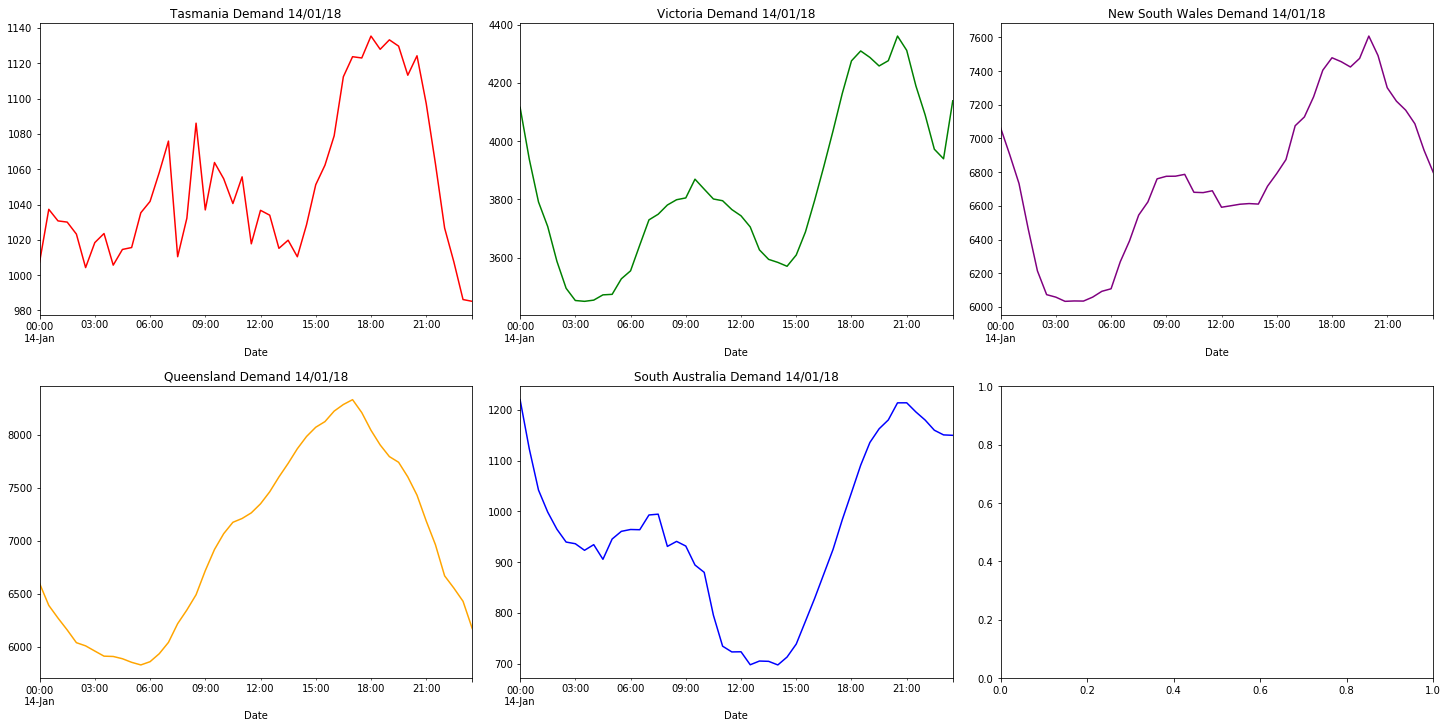

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10), constrained_layout=True)

data.groupby("Region").get_group("TAS")["TotalDemand"]["2018-1-14"].plot(color= "red",title="Tasmania Demand 14/01/18",ax=axes[0,0])
data.groupby("Region").get_group("VIC")["TotalDemand"]["2018-1-14"].plot(color= "green",title="Victoria Demand 14/01/18",ax=axes[0,1])
data.groupby("Region").get_group("NSW")["TotalDemand"]["2018-1-14"].plot(color= "purple",title="New South Wales Demand 14/01/18",ax=axes[0,2])
data.groupby("Region").get_group("QLD")["TotalDemand"]["2018-1-14"].plot(color= "orange",title="Queensland Demand 14/01/18",ax=axes[1,0])
data.groupby("Region").get_group("SA")["TotalDemand"]["2018-1-14"].plot(color="blue",title="South Australia Demand 14/01/18",ax=axes[1,1])

## Summer Week (14/01/2018 - 20/01/2019)

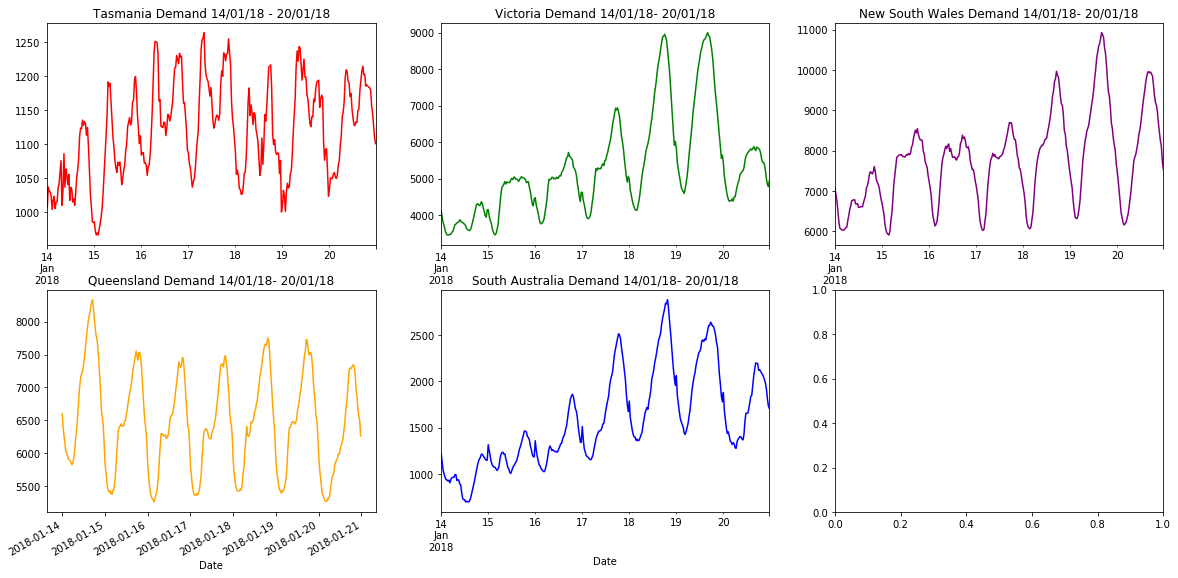

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

data.groupby("Region").get_group("TAS")["TotalDemand"]["2018-1-14":"2018-1-20"].plot(color= "red",title="Tasmania Demand 14/01/18 - 20/01/18",ax=axes[0,0])
data.groupby("Region").get_group("VIC")["TotalDemand"]["2018-1-14":"2018-1-20"].plot(color= "green",title="Victoria Demand 14/01/18- 20/01/18",ax=axes[0,1])
data.groupby("Region").get_group("NSW")["TotalDemand"]["2018-1-14":"2018-1-20"].plot(color= "purple",title="New South Wales Demand 14/01/18- 20/01/18",ax=axes[0,2])
data.groupby("Region").get_group("QLD")["TotalDemand"]["2018-1-14":"2018-1-20"].plot(color= "orange",title="Queensland Demand 14/01/18- 20/01/18",ax=axes[1,0])
data.groupby("Region").get_group("SA")["TotalDemand"]["2018-1-14":"2018-1-20"].plot(color="blue",title="South Australia Demand 14/01/18- 20/01/18",ax=axes[1,1])